# Fractional Brownian Motion Using Variance Ratio Tests

Consider a sample of $t$ measurements,

$
\begin{align}
X_0, X_1, X_2, \ldots, X_t
\end{align}
$

A test is desired to determine if the series represents brownian motion, which is defined by,

$
\begin{align}
X_t = \sum_{i=1}^t X_i - X_{i-1} = \sum_{i=1}^t \Delta X_{i}
\end{align}
$

where $\Delta X_i$ are independent and identically distributed with distribution,

$
\begin{align}
\Delta X_i \sim \text{Normal}(0, \sigma^2)
\end{align}
$

and

$
\begin{align}
\text{Cov}(\Delta X_i \Delta X_j) = \sigma^2 \delta_{ij}
\end{align}
$

This is the homoscedasticity assumption. Consider the difference,

$
\begin{align}
\Delta X_i(s) = X_i - X_{i+s}
\end{align}
$

So that,

$
\begin{align}
X_t = \sum_{i=1}^n \Delta X_i(s)
\end{align}
$

with $t=ns$. Let, 

$
\begin{align}
\sigma^2(s) = \text{Var}\left(\Delta X_i (s) \right)
\end{align}
$

Recall for brownian motion $\sigma_B^2(t) = \sigma^2t$, it follows that $\sigma^2_B(s) = \sigma^2(1)s$. Consider the ratio,

$
\begin{align}
\text{VR}(s) = \frac{\sigma^2(s)}{\sigma_B^2(s)}
\end{align}
$

where,

$
\begin{align}
&\sigma^2(1) = \frac{1}{t-1} \sum_{i=1}^t \left(X_i - X_{i-1} - \mu \right) \\
&\mu = \frac{1}{t} \left( X_t - X_0 \right)
\end{align}
$

In Lo and Mackinlay, 1988, "Stock market Prices do not Follow Random Walks" it was shown that an unbiased estimator of</br>
$\sigma^2(s)$ is given by,

$
\begin{align}
\sigma^2(s) = \frac{1}{m} \sum_{i=s}^t \left( X_t - X_{t-s} - s\mu \right)^2
\end{align}
$

where,

$
\begin{align}
m = \left(t - s + 1 \right) \left( 1 - \frac{s}{t} \right)
\end{align}
$

If $X_t$ is brownian motion, $\sigma^2(s) = \sigma^2(1)$, $s = \sigma^2_B(s)$. It follows that $\text{VR}(s) = 1$. A test statistic</br>
for this condition is given by,

$
\begin{align}
Z(s) = \frac{\text{VR}(s) - 1}{\sqrt{\theta(s)}}
\end{align}
$

where,

$
\begin{align}
\theta(s) = \frac{2\left( 2s - 1 \right)\left( s - 1 \right)}{3st}
\end{align}
$

and $Z(s) \sim \text{Normal}(0,1)$. This test-statistic was derived assuming homoscedasticity which implies that the</br>
random component is independent of $s$. If instead the random component varies with $s$ heteroscedasticity is assumed.

For this case the test-statistic is given by,

$
\begin{align}
Z^\ast(s) = \frac{\text{VR}(s) - 1}{\sqrt{\theta^\ast (s)}}
\end{align}
$

where,

$
\begin{align}
&\theta^\ast (s) = \sum_{j=1}^{s-1} \left[ \frac{2\left( s - j \right) } {s} \right]^2 \hat{\delta}(j) \\
&\hat{\delta}(j) = \frac{\sum_{i=j+1}^t \left( X_i - X_{i-1} - \mu \right)^2 \left( X_{i-j} - X_{i-j-1} - \mu \right)^2}{\left[ \sum_{i=1}^t \left( X_i - X_{i-1} - \mu \right)^2 \right]^2}
\end{align}
$

## Import

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import fbm
from lib import config
from lib import plots
from lib.plot_config import (PlotDataType, PlotFuncType)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
def lag_var(samples, s_vals):
    return numpy.array([fbm.lag_var(samples, s) for s in s_vals])

def vr_stat_homo(samples, s_vals):
    vr = numpy.array([])
    for sample in samples:
        vr = numpy.append(vr, [fbm.vr_stat_homo(sample, s) for s in s_vals], axis=0)
    return vr

def vr(samples, s_vals):
    return [fbm.vr(samples, s) for s in s_vals]
    
def labels(H_vals):
    return [f"H={H}" for H in H_vals]

def sample_plot(samples, H):
    title = f"Fractional Brownain Motion Example: H={H}, σ=1.0"
    plots.curve(samples, title=title, data_type=PlotDataType.TIME_SERIES)
    
def lag_var_plot(samples, s_vals, H):
    title = r"Fractional Brownain Motion $\sigma^2(s)$" + f": H={H}, σ=1.0"
    plots.fcompare(lag_var(samples, s_vals), x=s_vals, npts=20, title=title, params=[H], func_type=PlotFuncType.LAGG_VAR)
    
def vr_plot(samples, s_vals, H):
    title = r"Fractional Brownain Motion $VR(s)$: " + f"H={H}, σ=1.0"
    plots.fcompare(vr(samples, s_vals), x=s_vals, npts = 20, title=title, params=[H], func_type=PlotFuncType.VR)    

## $\sigma^2 (s)$ and $\text{VR}(s)$ Verification

The $\sigma^2 (s)$ calculation is verified by comparing with $t^{2H}$. The variance ration is given by,

$
\begin{align}
\text{VR}(s) = \frac{\sigma^2(s)}{\sigma_B^2(s)}
\end{align}
$

Since $\sigma^2(s) \sim t^{2H}$ and $\sigma_B^2(s) \sim t$ it follows that $\text{VR}(s) \sim t^{2H - 1}$. Here the variance ratio computed from simulations is</br>
compared with $t^{2H-1}$

In [3]:
npts = 2**16
s_vals = numpy.array([int(s) for s in plots.logspace(100, npts/10, 1.0)])
H_vals = [0.5, 0.3, 0.8]
samples = [fbm.generate_fft(H, npts) for H in H_vals]

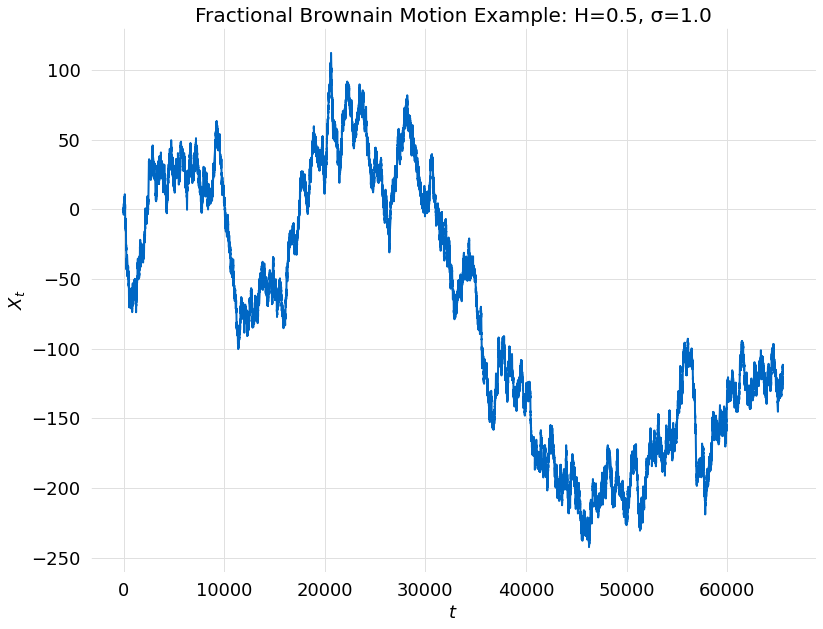

In [4]:
sample_plot(samples[0], H_vals[0])

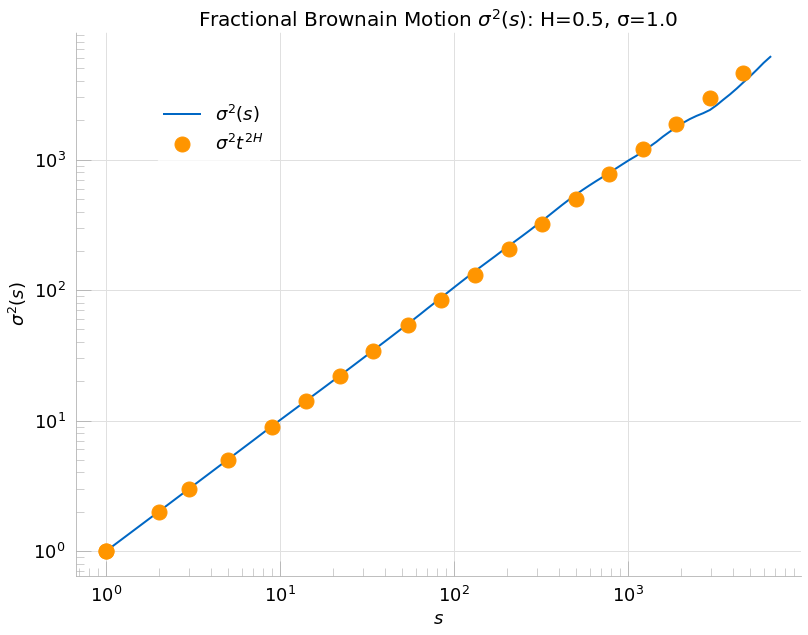

In [5]:
lag_var_plot(samples[0], s_vals, H_vals[0])

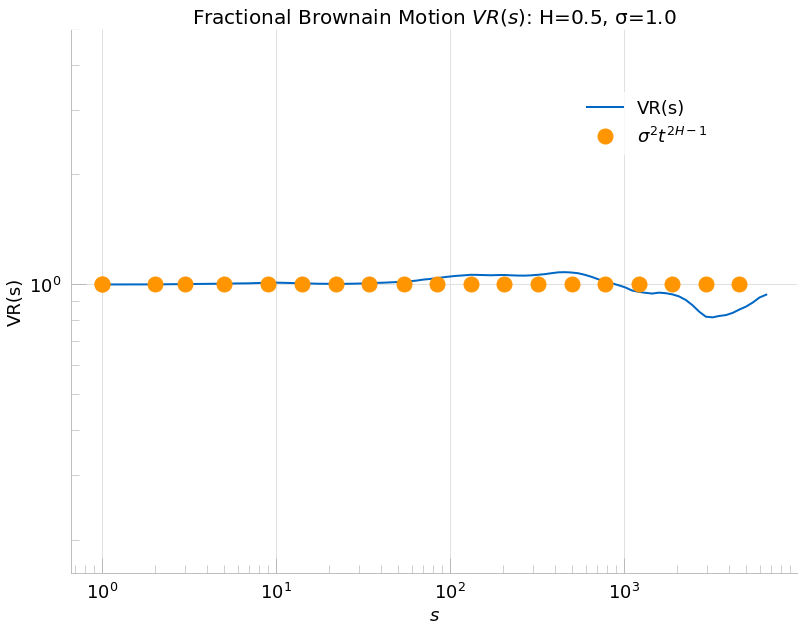

In [6]:
vr_plot(samples[0], s_vals, H_vals[0])

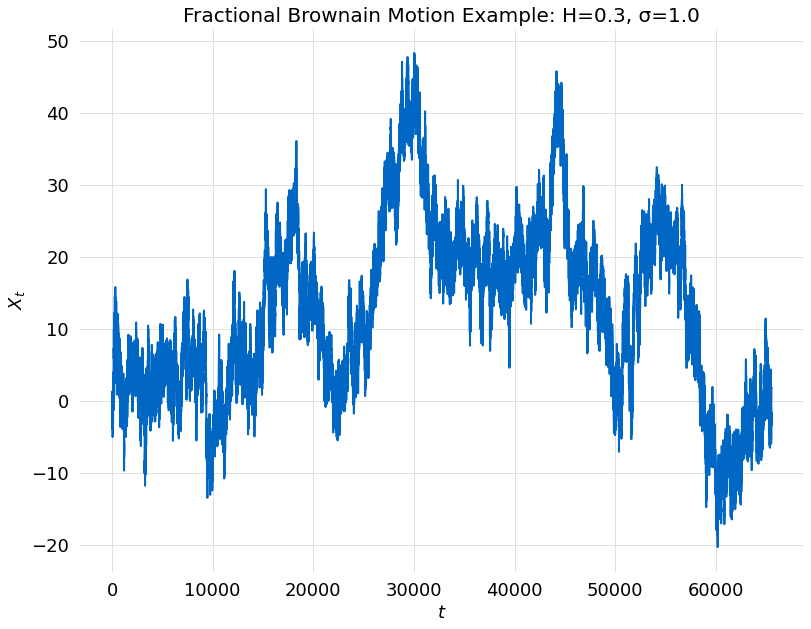

In [7]:
sample_plot(samples[1], H_vals[1])

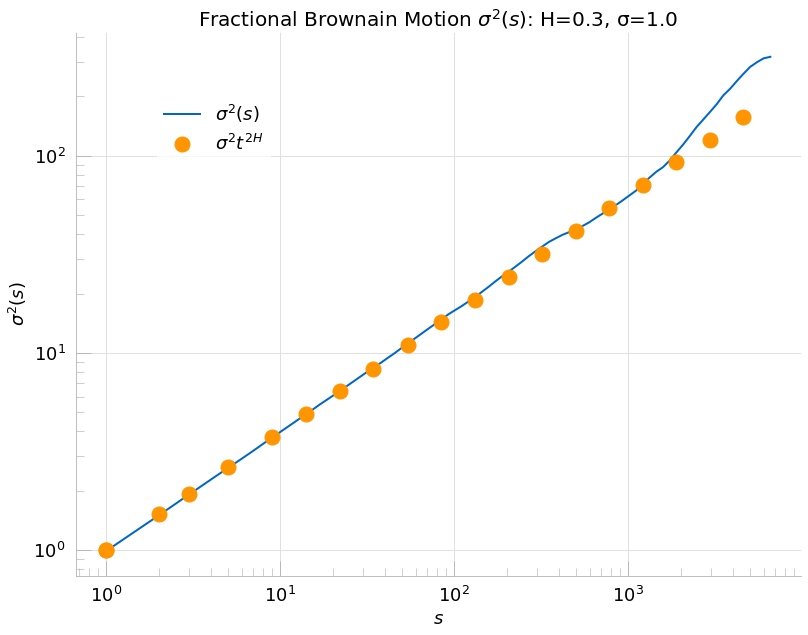

In [8]:
lag_var_plot(samples[1], s_vals, H_vals[1])

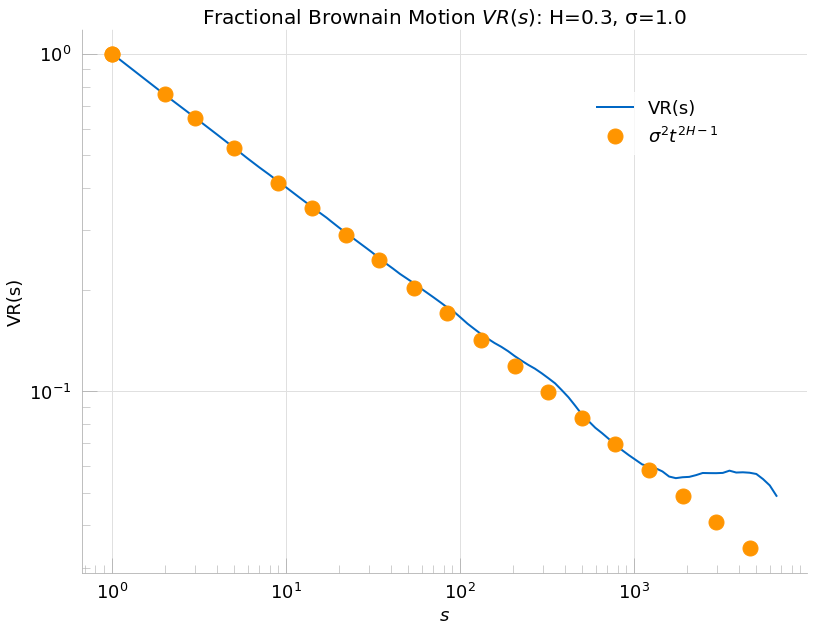

In [9]:
vr_plot(samples[1], s_vals, H_vals[1])

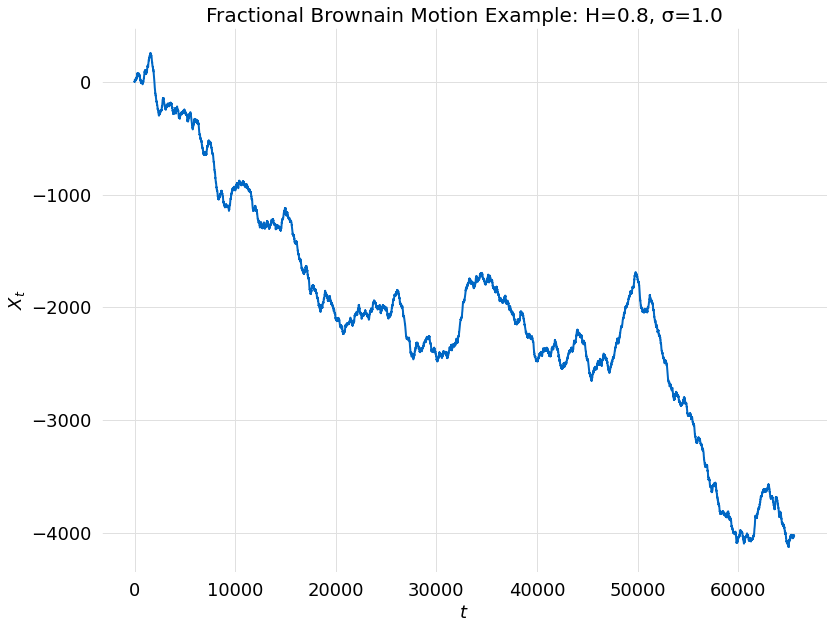

In [10]:
sample_plot(samples[2], H_vals[2])

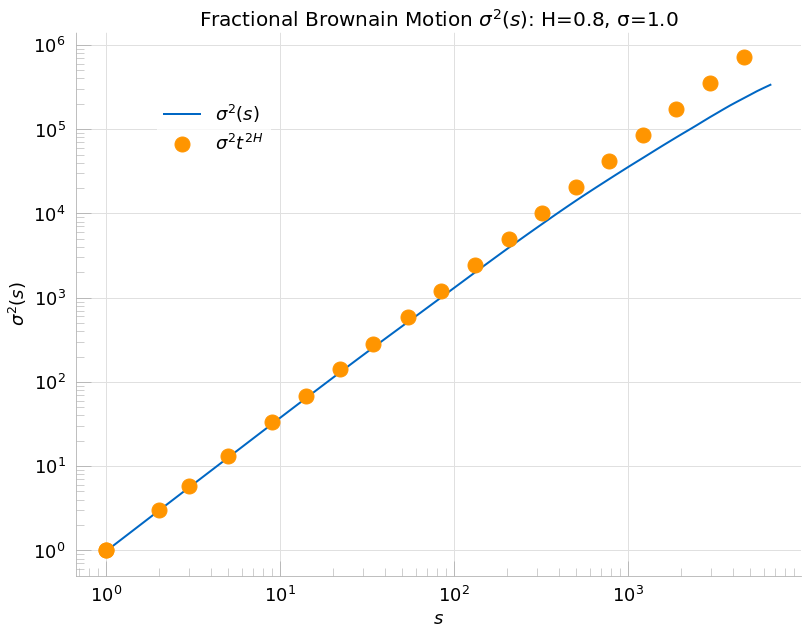

In [11]:
lag_var_plot(samples[2], s_vals, H_vals[2])

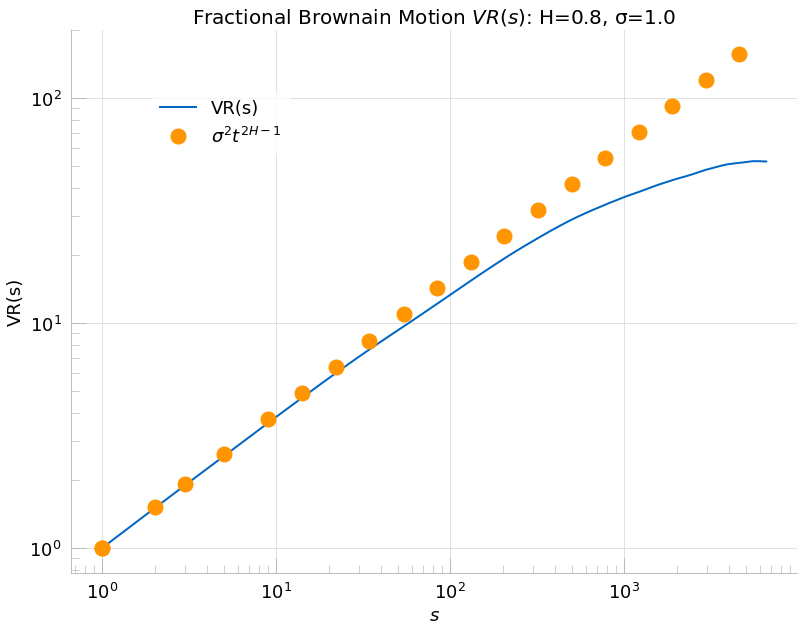

In [12]:
vr_plot(samples[2], s_vals, H_vals[2])

## Small Sample Size

In the previous verification section a rather large sample size was used to provide enough data to compute accurate averages. In general</br>
this is not practical. here more realistic sample sizes are used to see the impact on the analysis. 

In [13]:
npts = 2**9
s_vals = numpy.array([int(s) for s in plots.logspace(100, npts/10, 1.0)])
H_vals = [0.5, 0.3, 0.8]
samples = [fbm.generate_fft(H, npts) for H in H_vals]

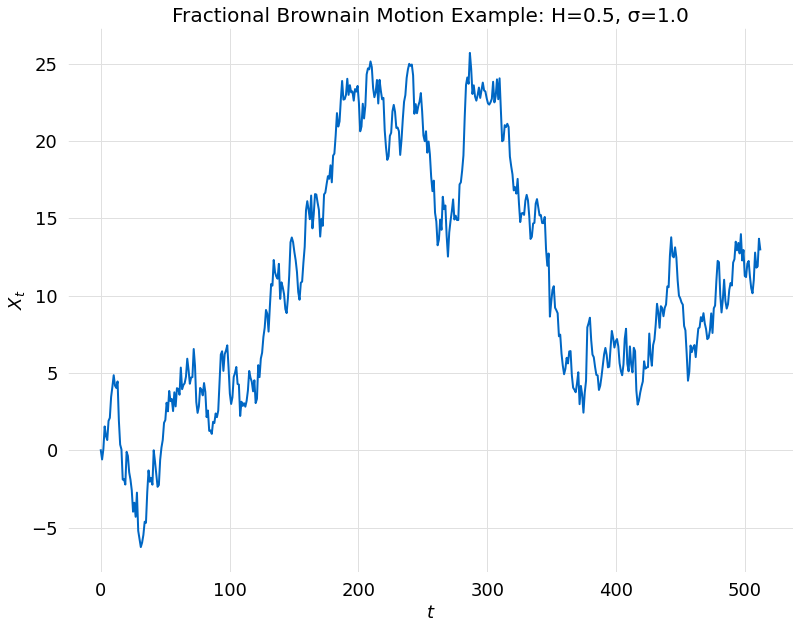

In [14]:
sample_plot(samples[0], H_vals[0])

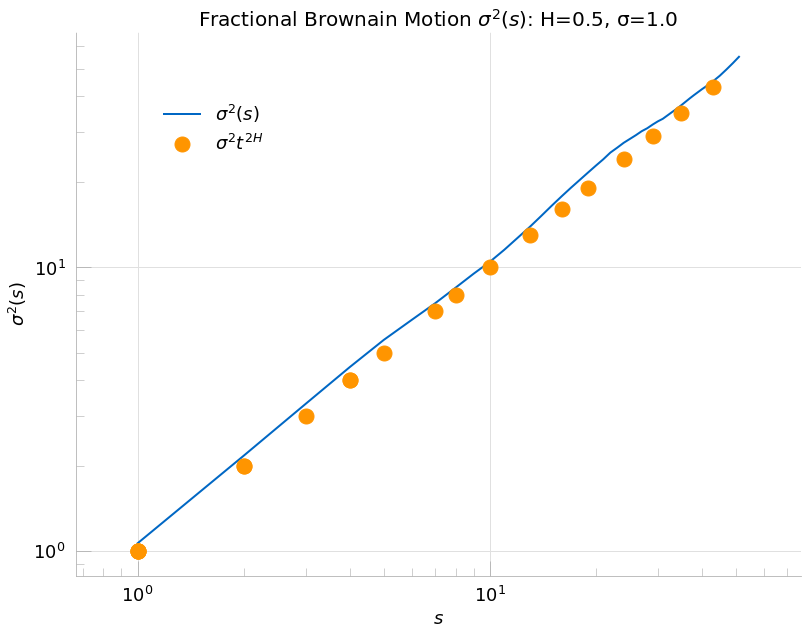

In [15]:
lag_var_plot(samples[0], s_vals, H_vals[0])

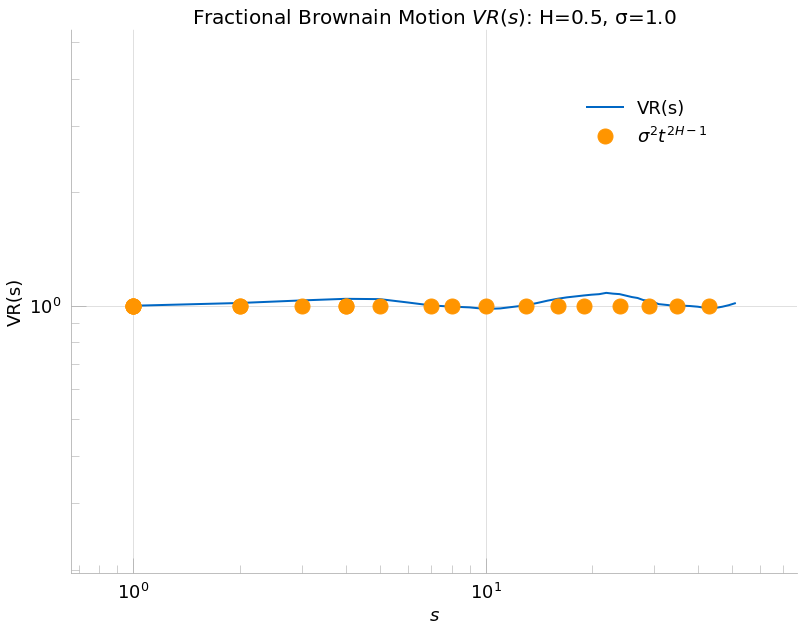

In [33]:
vr_plot(samples[0], s_vals, H_vals[0])

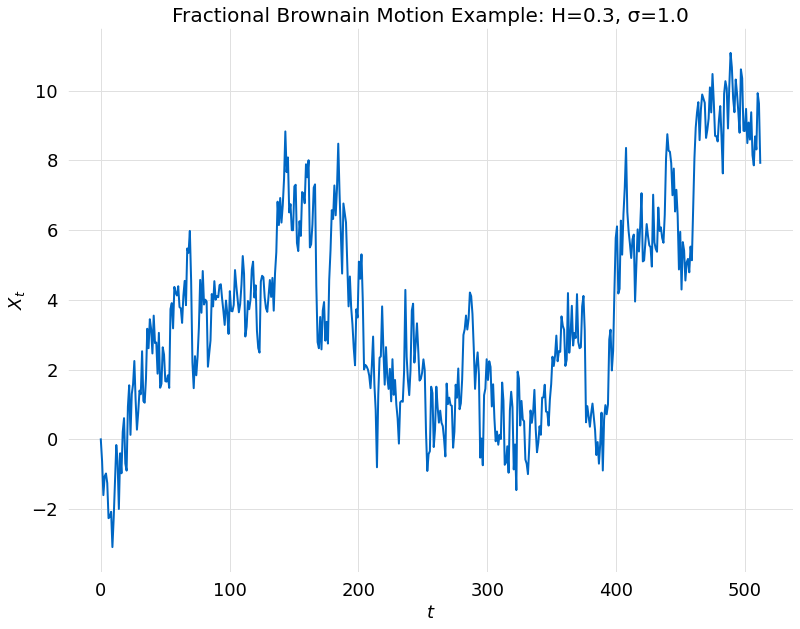

In [17]:
sample_plot(samples[1], H_vals[1])

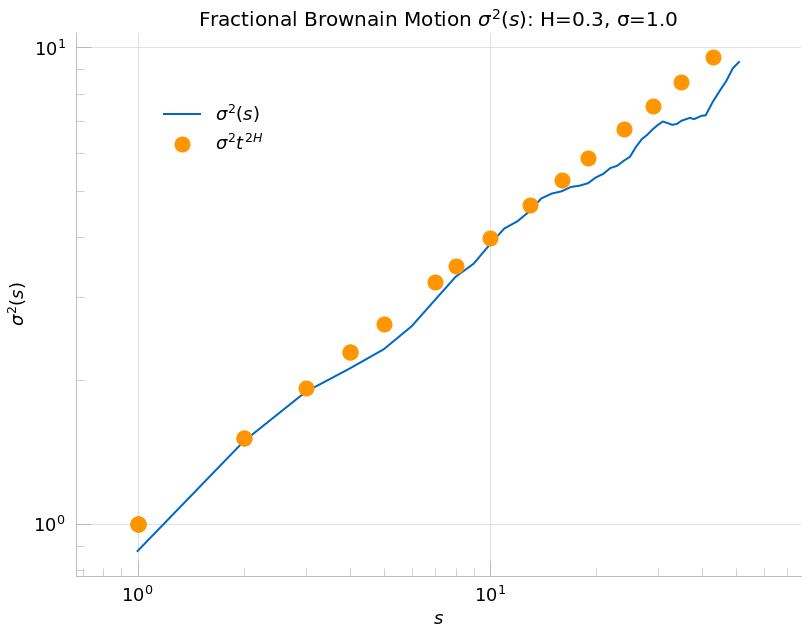

In [18]:
lag_var_plot(samples[1], s_vals, H_vals[1])

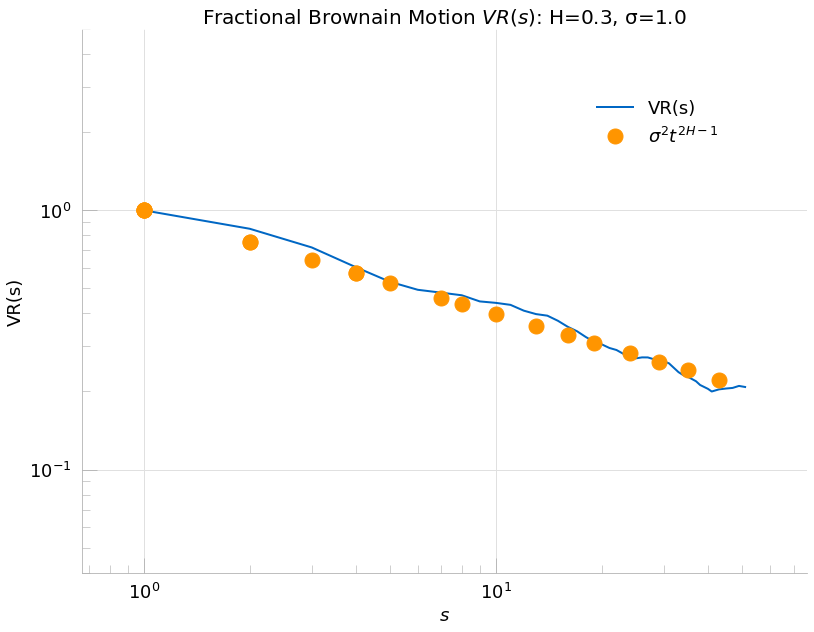

In [34]:
vr_plot(samples[1], s_vals, H_vals[1])

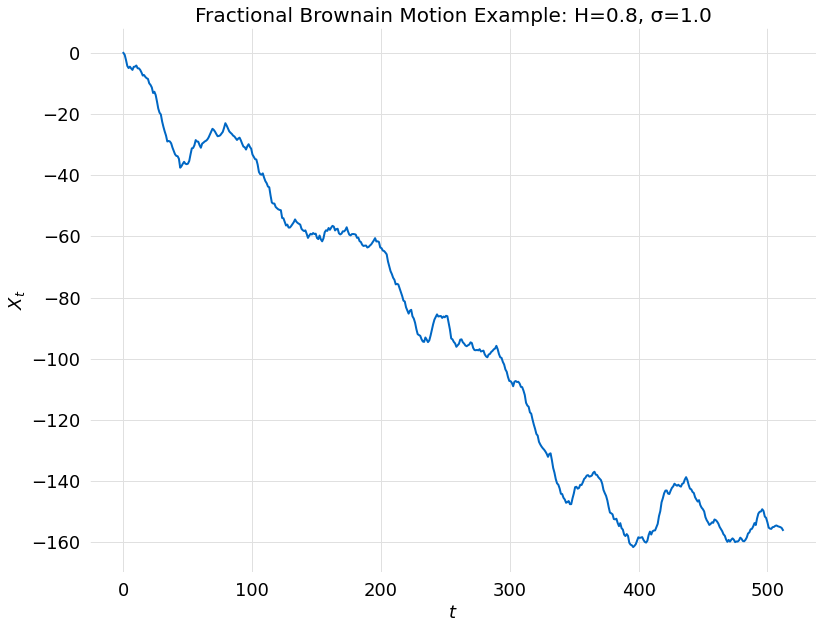

In [20]:
sample_plot(samples[2], H_vals[2])

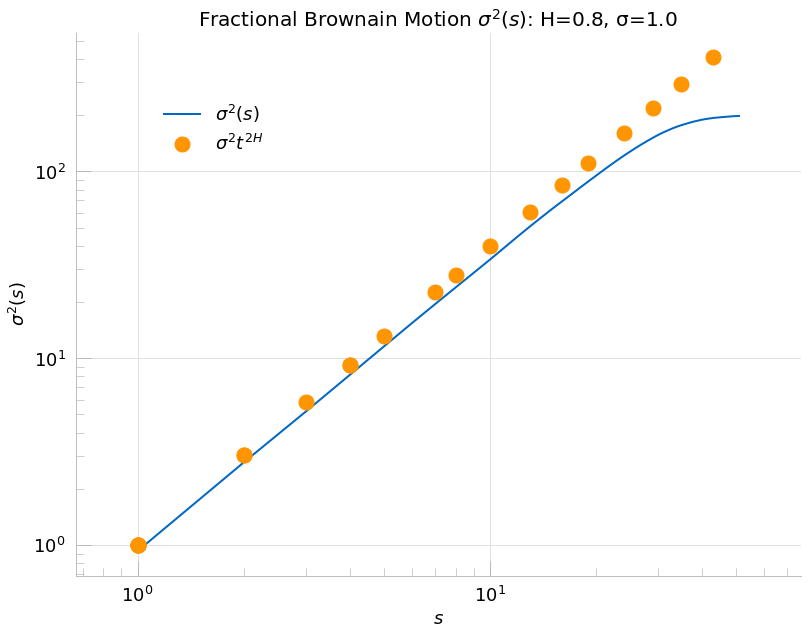

In [21]:
lag_var_plot(samples[2], s_vals, H_vals[2])

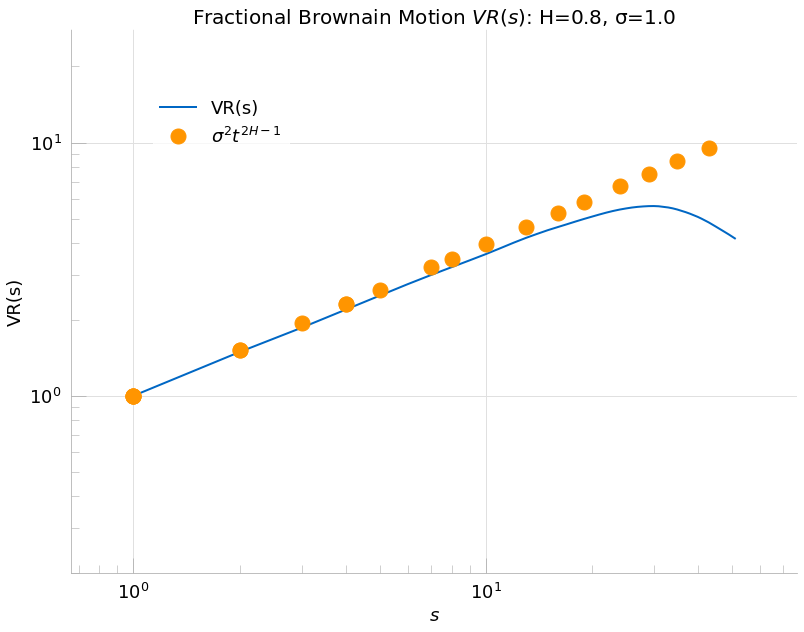

In [35]:
vr_plot(samples[2], s_vals, H_vals[2])

## Homoscedasticity Variance Ratio Simulations

In this section simulation that test the homoscedasticity variance ration test statistic are presented. The first plots compare</br>
$\sigma^2(s)$ with the FBM variance $s^{2H}$